In [1]:
from arbre_binaire import Noeud, Arbre
from draw_arbre import afficher

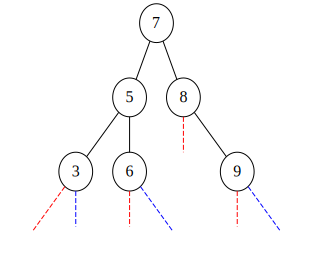

In [2]:
n=Noeud(7,Noeud(5,Noeud(3),Noeud(6)),Noeud(8,None,Noeud(9)))
a=Arbre(n)
afficher(a)

In [3]:
"""
Fonctions utilisant les méthodes d'arbres
"""
def taille(a):
    if a.est_vide():
        return 0
    else:
        return 1 + taille(a.fils_gauche()) + taille(a.fils_droit())

def hauteur(a):
    if a.est_vide():
        return -1
    else:
        return 1 + max(hauteur(a.fils_gauche()),hauteur(a.fils_droit()))

def niveau(a,p,nds=[]):
    if p == 0:
        if not a.est_vide():
            # on empile dans une liste les valeurs
            nds.append(a.racine.valeur)
    else:
        niveau(a.fils_gauche(),p-1,nds)
        niveau(a.fils_droit(),p-1,nds)
    return nds

print("Taille de l'arbre:",taille(a))
print("Hauteur de l'arbre:",hauteur(a))
for i in range(hauteur(a)+1):
    print("Niveau %s : %s" % (i,niveau(a,i,[])))

Taille de l'arbre: 6
Hauteur de l'arbre: 2
Niveau 0 : [7]
Niveau 1 : [5, 8]
Niveau 2 : [3, 6, 9]


In [4]:
def appartient(x,a):
    if a.est_vide():
        return False
    else:
        if x < a.racine.valeur:
            return appartient(x,a.fils_gauche())
        elif x > a.racine.valeur:
            return appartient(x,a.fils_droit())
        else:
            return True

In [5]:
def ajoute(x,a):
    if a.est_vide():
        a = Arbre(x)
    else:
        if x < a.racine.valeur:
            if a.racine.gauche is None:
                a.racine.gauche = Noeud(x)
            else:
                ajoute(x,a.fils_gauche())
        if x > a.racine.valeur:
            if a.racine.droit is None:
                a.racine.droit = Noeud(x)
            else:
                ajoute(x,a.fils_droit())
    return a

In [6]:
appartient(7,a)

True

In [7]:
ajoute(4,a)
print(a)

Noeud(7,Noeud(5,Noeud(3,None,Noeud(4,None,None)),Noeud(6,None,None)),Noeud(8,None,Noeud(9,None,None)))


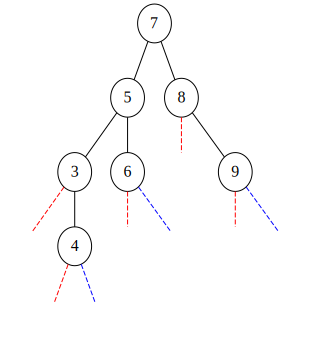

In [8]:
afficher(a)

In [9]:
class ABR(Arbre):
    
    def __init__(self,a):
        super().__init__(a.racine)
        
    def appartenir(self,x):
        return appartient(x,self)
    
    def ajouter(self,x):
        return ajoute(x,self)

In [10]:
abr=ABR(a)

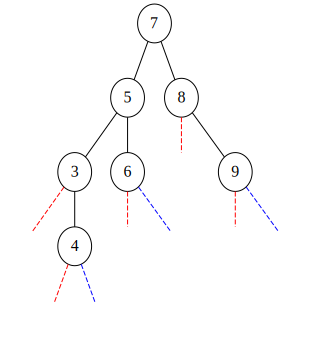

In [11]:
afficher(abr)

In [12]:
abr.appartenir(2)

False

In [13]:
abr.ajouter(2)

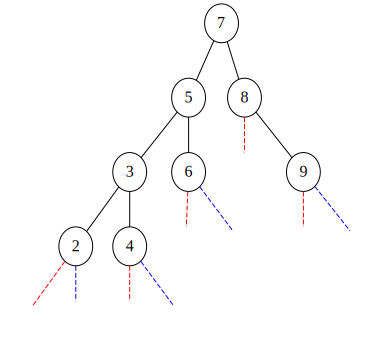

In [14]:
afficher(abr)

In [15]:
a2 = Arbre()
print("a2 est un arbre vide:",a2.racine)
a2 = ajoute(3,a2)
print("a2 possède un noeud de valeur 3:",a2)
a2 = ajoute(2,a2)
print(a2)
a2 = ajoute(5,a2)
print(a2)
a2 = ajoute(1,a2)
print(a2)
a2 = ajoute(7,a2)
print(a)
a2 = ajoute(6,a2)
print(a2)
a2 = ajoute(8,a2)
print(a2)

a2 est un arbre vide: 
a2 possède un noeud de valeur 3: Noeud(3,None,None)
Noeud(3,Noeud(2,None,None),None)
Noeud(3,Noeud(2,None,None),Noeud(5,None,None))
Noeud(3,Noeud(2,Noeud(1,None,None),None),Noeud(5,None,None))
Noeud(7,Noeud(5,Noeud(3,Noeud(2,None,None),Noeud(4,None,None)),Noeud(6,None,None)),Noeud(8,None,Noeud(9,None,None)))
Noeud(3,Noeud(2,Noeud(1,None,None),None),Noeud(5,None,Noeud(7,Noeud(6,None,None),None)))
Noeud(3,Noeud(2,Noeud(1,None,None),None),Noeud(5,None,Noeud(7,Noeud(6,None,None),Noeud(8,None,None))))


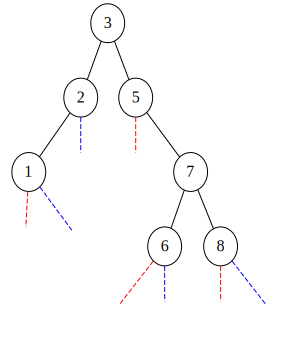

In [16]:
afficher(a2)

In [17]:
def minimum(a):
    if a.racine.gauche is None:
        return a.racine.valeur
    else:
        return minimum(a.fils_gauche())

In [18]:
minimum(a)

2

In [19]:
def supprime_minimum(a):
    print(a)
    if a.racine.gauche is None:
        a = a.fils_droit()
    else:
        supprime_minimum(a.fils_gauche())
    return a

In [20]:
a=supprime_minimum(a)

Noeud(7,Noeud(5,Noeud(3,Noeud(2,None,None),Noeud(4,None,None)),Noeud(6,None,None)),Noeud(8,None,Noeud(9,None,None)))
Noeud(5,Noeud(3,Noeud(2,None,None),Noeud(4,None,None)),Noeud(6,None,None))
Noeud(3,Noeud(2,None,None),Noeud(4,None,None))
Noeud(2,None,None)


In [21]:
print(type(a))

<class 'arbre_binaire.Arbre'>


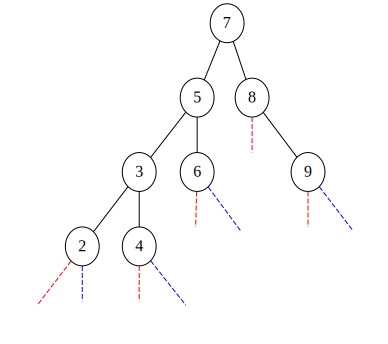

In [22]:
afficher(a)

In [23]:
    
def supprime(x,a):
    if a is None:
        return None
    else:
        if x<a.valeur:
            return Noeud(a.valeur,supprime(x,a.gauche),a.droit)
        elif x>a.valeur:
            return Noeud(a.valeur,a.gauche,supprime(x,a.droit))
        else:
            if a.droit is None:
                return a.gauche
            else:
                return Noeud(minimum(a.droit),a.gauche,supprime_minimum(a.droit))